<a href="https://colab.research.google.com/github/AthiFiz/deepLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf

In [16]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-15 11:35:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.207, 74.125.69.207, 64.233.181.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   244MB/s    in 0.4s    

2023-11-15 11:35:15 (244 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [17]:
!ls pizza_steak

test  train


In [18]:
!ls pizza_steak/test

pizza  steak


In [19]:
!ls pizza_steak/test/pizza

1001116.jpg  1459760.jpg  2082495.jpg  254812.jpg   328965.jpg	 3785667.jpg  625434.jpg
1032754.jpg  1475479.jpg  2101820.jpg  2549661.jpg  3296507.jpg  3793004.jpg  645087.jpg
103708.jpg   1484836.jpg  2111981.jpg  2572488.jpg  3296907.jpg  380739.jpg   648055.jpg
1060407.jpg  148765.jpg   2124579.jpg  2582289.jpg  3316410.jpg  3814200.jpg  65128.jpg
106507.jpg   1503858.jpg  212995.jpg   2583389.jpg  331644.jpg	 3827990.jpg  666569.jpg
1067986.jpg  1506213.jpg  2157510.jpg  2605853.jpg  335474.jpg	 3898047.jpg  678708.jpg
1106738.jpg  1507019.jpg  2161321.jpg  2615100.jpg  3375083.jpg  3913440.jpg  714866.jpg
1119571.jpg  1512557.jpg  2165223.jpg  2619955.jpg  3376617.jpg  3919151.jpg  723745.jpg
11297.jpg    153195.jpg   2195935.jpg  2631321.jpg  3385460.jpg  395662.jpg   724290.jpg
1152100.jpg  1555015.jpg  2203687.jpg  2719697.jpg  3392194.jpg  397910.jpg   728260.jpg
1179703.jpg  1594097.jpg  2218680.jpg  2782998.jpg  341377.jpg	 398345.jpg   729262.jpg
1180001.jpg  1618659.jpg  

In [20]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"dirpath: {dirpath}")

dirpath: pizza_steak
dirpath: pizza_steak/test
dirpath: pizza_steak/test/steak
dirpath: pizza_steak/test/pizza
dirpath: pizza_steak/train
dirpath: pizza_steak/train/steak
dirpath: pizza_steak/train/pizza


In [21]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"{dirpath}: {dirnames} --> {filenames}")

pizza_steak: ['test', 'train'] --> []
pizza_steak/test: ['steak', 'pizza'] --> []
pizza_steak/test/steak: [] --> ['148595.jpg', '3786535.jpg', '2061929.jpg', '290406.jpg', '1868005.jpg', '2752603.jpg', '3504515.jpg', '66207.jpg', '3048920.jpg', '281731.jpg', '1972463.jpg', '2339231.jpg', '670345.jpg', '1982192.jpg', '3681340.jpg', '13023.jpg', '400951.jpg', '2092345.jpg', '746921.jpg', '565095.jpg', '3541033.jpg', '2071320.jpg', '2475366.jpg', '912108.jpg', '1902895.jpg', '401660.jpg', '717293.jpg', '1285886.jpg', '958704.jpg', '1319758.jpg', '2077577.jpg', '2944161.jpg', '2315011.jpg', '2117351.jpg', '367422.jpg', '3062369.jpg', '3173402.jpg', '3903517.jpg', '2943601.jpg', '847477.jpg', '1874088.jpg', '1012080.jpg', '1379840.jpg', '3060047.jpg', '354513.jpg', '3901703.jpg', '2861000.jpg', '2649745.jpg', '2824517.jpg', '504349.jpg', '3873283.jpg', '1983405.jpg', '1655387.jpg', '1288129.jpg', '3352834.jpg', '87246.jpg', '2825105.jpg', '3029602.jpg', '6261.jpg', '2600656.jpg', '2138503.j

In [22]:
num_steak_images_train = os.listdir("pizza_steak/train/steak")

In [23]:
len(num_steak_images_train)

750

In [24]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print (f"Image shape: {img.shape}")

  return img

Image shape: (511, 512, 3)


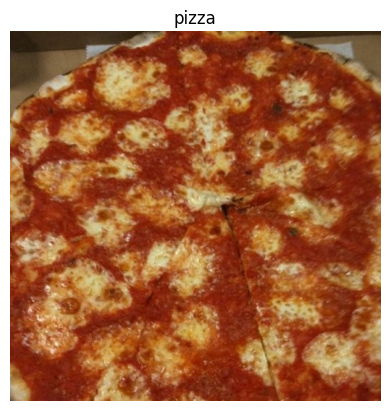

In [26]:
img = view_random_image("pizza_steak/test/", "pizza")

In [27]:
img

array([[[ 45,  32,  16],
        [ 45,  32,  16],
        [ 45,  32,  16],
        ...,
        [ 60,  43,  25],
        [ 59,  42,  26],
        [ 57,  40,  24]],

       [[ 43,  30,  14],
        [ 43,  30,  14],
        [ 43,  30,  14],
        ...,
        [ 58,  41,  23],
        [ 57,  40,  22],
        [ 56,  39,  21]],

       [[ 41,  28,  12],
        [ 41,  28,  12],
        [ 42,  29,  13],
        ...,
        [ 54,  37,  17],
        [ 54,  37,  17],
        [ 53,  36,  16]],

       ...,

       [[112,  85,  58],
        [118,  91,  64],
        [126,  99,  70],
        ...,
        [120,  37,   7],
        [113,  32,   3],
        [109,  28,   0]],

       [[107,  81,  54],
        [112,  86,  59],
        [121,  94,  65],
        ...,
        [124,  45,  14],
        [117,  38,   7],
        [109,  33,   1]],

       [[103,  79,  51],
        [109,  83,  56],
        [117,  90,  63],
        ...,
        [128,  52,  18],
        [120,  44,  10],
        [112,  38,   3]]

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed=42

train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 139ms/step - loss: 0.6719 - accuracy: 0.6120 - val_loss: 0.4659 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4992 - accuracy: 0.7760 - val_loss: 0.4574 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 7s 150ms/step - loss: 0.4878 - accuracy: 0.7720 - val_loss: 0.4084 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4564 - accuracy: 0.7993 - val_loss: 0.3968 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 7s 151ms/step - loss: 0.4224 - accuracy: 0.8133 - val_loss: 0.3738 - val_accuracy: 0.8260


In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed=42

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               class_mode="binary",
                                               batch_size=32,
                                               target_size=(224,224),
                                               seed=42)

valid_data = test_datagen.flow_from_directory(test_dir,
                                              class_mode="binary",
                                              target_size=(224,224),
                                              batch_size=32,
                                              seed=42)


model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 125ms/step - loss: 0.9339 - accuracy: 0.6753 - val_loss: 0.4582 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 7s 151ms/step - loss: 0.4324 - accuracy: 0.8020 - val_loss: 0.3729 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 11s 224ms/step - loss: 0.3445 - accuracy: 0.8600 - val_loss: 0.3752 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 11s 245ms/step - loss: 0.2300 - accuracy: 0.9160 - val_loss: 0.3496 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.1402 - accuracy: 0.9567 - val_loss: 0.3888 - val_accuracy: 0.8100


<Axes: >

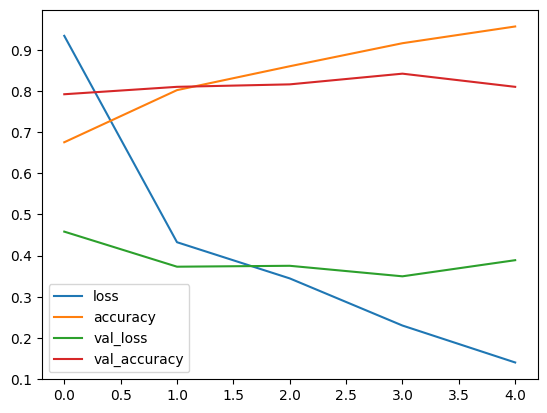

In [33]:
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [35]:
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.933938,0.675333,0.458161,0.792
1,0.432432,0.802000,0.372936,0.810
2,0.344512,0.860000,0.375152,0.816
3,0.229969,0.916000,0.349582,0.842
4,0.140206,0.956667,0.388756,0.810


In [36]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

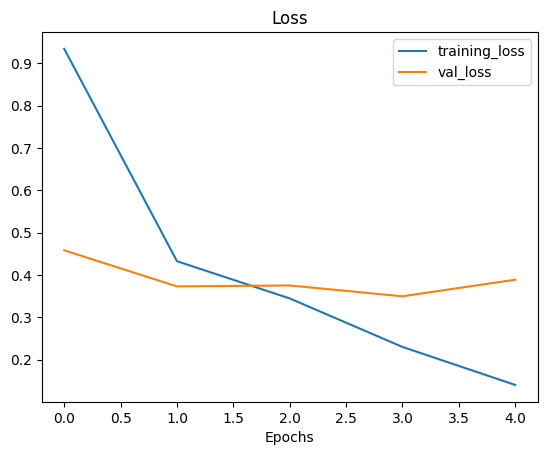

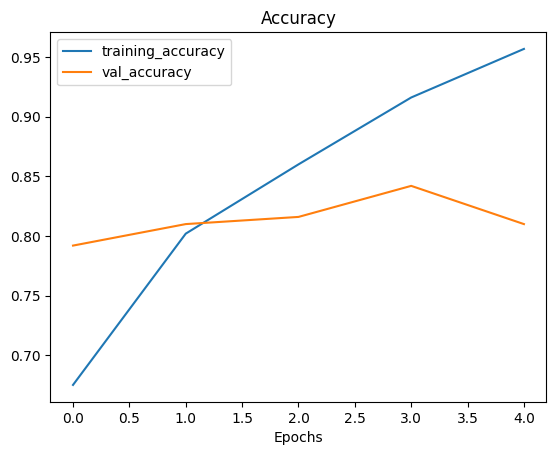

In [37]:
plot_loss_curves(history_4)

In [38]:
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_23 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_24 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_7 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import Adam

In [47]:
model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [48]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [50]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 160ms/step - loss: 0.6506 - accuracy: 0.6167 - val_loss: 0.5025 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4895 - accuracy: 0.7673 - val_loss: 0.4498 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4515 - accuracy: 0.7887 - val_loss: 0.3974 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4070 - accuracy: 0.8267 - val_loss: 0.3624 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 7s 156ms/step - loss: 0.3852 - accuracy: 0.8280 - val_loss: 0.3695 - val_accuracy: 0.8220


In [51]:
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 10)       

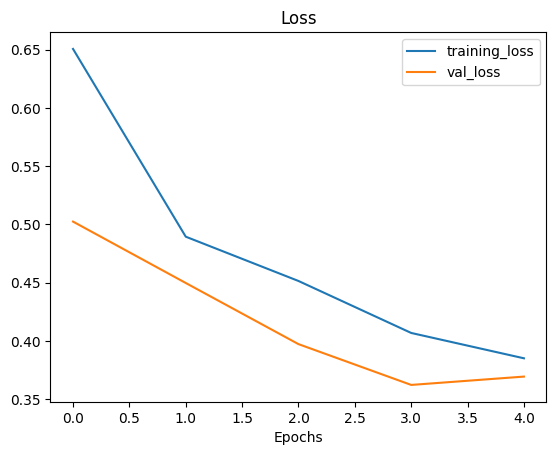

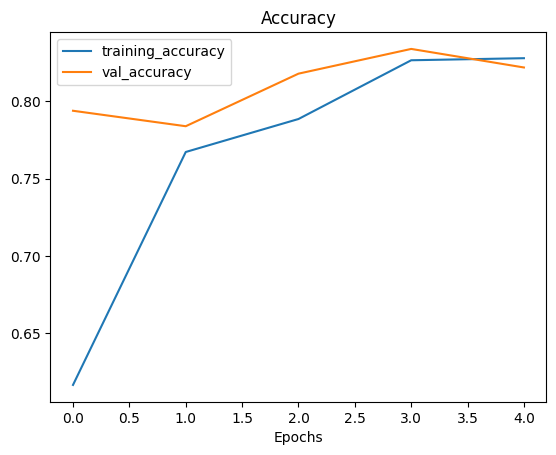

In [52]:
plot_loss_curves(history_5)

In [63]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [64]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [65]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

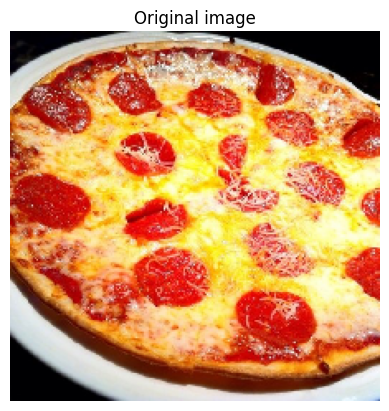

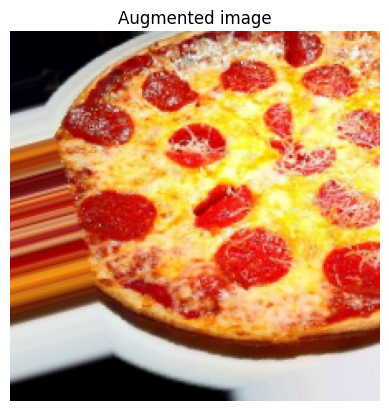

In [66]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [67]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 516ms/step - loss: 0.7284 - accuracy: 0.4867 - val_loss: 0.6886 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 23s 501ms/step - loss: 0.6942 - accuracy: 0.5047 - val_loss: 0.6776 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6913 - accuracy: 0.5380 - val_loss: 0.6605 - val_accuracy: 0.6140
Epoch 4/5
47/47 [==============================] - 25s 539ms/step - loss: 0.6380 - accuracy: 0.6693 - val_loss: 0.7448 - val_accuracy: 0.5280
Epoch 5/5
47/47 [==============================] - 23s 482ms/step - loss: 0.7515 - accuracy: 0.5107 - val_loss: 0.6654 - val_accuracy: 0.6040


In [69]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [70]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 458ms/step - loss: 0.7065 - accuracy: 0.5280 - val_loss: 0.6610 - val_accuracy: 0.5960
Epoch 2/5
47/47 [==============================] - 29s 605ms/step - loss: 0.6254 - accuracy: 0.6587 - val_loss: 0.5224 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 25s 541ms/step - loss: 0.5534 - accuracy: 0.7267 - val_loss: 0.4014 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4948 - accuracy: 0.7707 - val_loss: 0.3588 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5050 - accuracy: 0.7580 - val_loss: 0.3650 - val_accuracy: 0.8520


In [72]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 524ms/step - loss: 0.6250 - accuracy: 0.6447 - val_loss: 0.4477 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 26s 558ms/step - loss: 0.5342 - accuracy: 0.7353 - val_loss: 0.3993 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 29s 598ms/step - loss: 0.4862 - accuracy: 0.7627 - val_loss: 0.3637 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 26s 548ms/step - loss: 0.4804 - accuracy: 0.7687 - val_loss: 0.3919 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 23s 501ms/step - loss: 0.4828 - accuracy: 0.7793 - val_loss: 0.3758 - val_accuracy: 0.8420


--2023-11-15 12:23:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-11-15 12:23:24 (28.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



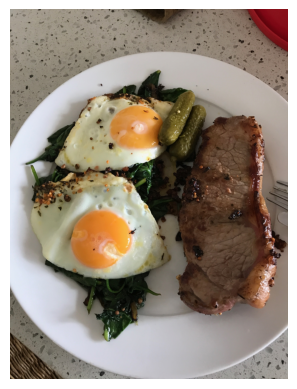

In [73]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [74]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [75]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [76]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [77]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [78]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 204ms/step


array([[0.8109519]], dtype=float32)

In [79]:
pred[0]

array([0.8109519], dtype=float32)

In [80]:
pred[0][0]

0.8109519

In [81]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 28ms/step


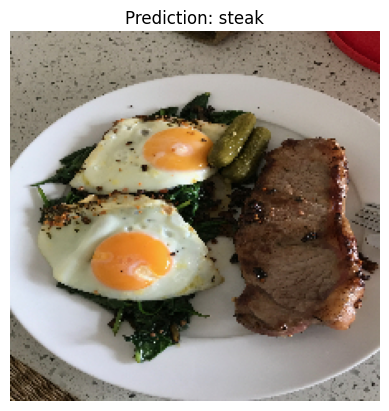

In [82]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)